## Imports

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from diversity import Metacommunity

np.random.seed(42)

## Image sources

- Emojis: Apple standard
- Penguins: http://clipart-library.com/clipart/1750373.htm

## Functions

In [2]:
def species_freq(y, outfile, figsize = (4, 2), linewidth = 3):
    x = list(range(len(y)))
    plt.figure(figsize=figsize)
    plt.bar(x, y, linewidth=linewidth, edgecolor="#000", facecolor="#eee")
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_linewidth(3) # set_visible(True)
    plt.ylim(0, 31)
    plt.savefig(outfile, transparent=True)
    return

def D1(y):
    tot = sum(y)
    P = [i/tot for i in y]
    return np.exp(-sum([i*np.log(i) for i in P]))

def similarity_matrix(S, outfile, scale=1, cmap="bone_r"):
    S = S**scale                    # if values are too close to 1, scale makes it easier to see differences
    figsize = (len(S), len(S))
    plt.figure(figsize=figsize)
    ax = sns.heatmap(S, cmap=cmap, cbar=False, vmin=0., vmax=1.)
    ax.axhline(y=0, color='k', linewidth=3)
    ax.axvline(x=0, color='k', linewidth=3)
    ax.axhline(y=len(S), color='k', linewidth=3)
    ax.axvline(x=len(S), color='k', linewidth=3)
    _ = plt.tight_layout()
    _ = plt.xticks([])
    _ = plt.yticks([])
    _ = plt.tight_layout()
    _ = plt.savefig(outfile, transparent=True)
    _ = plt.show()
    return

## Figure 1: Illustrates the effect of frequency on diversity

This section goes with Fig. 1 from the manuscript.

The icons are all standard Apple emojis. We generate the species-frequency distributions as follows.

### Community 1 (mostly apples)

1.896549191899248

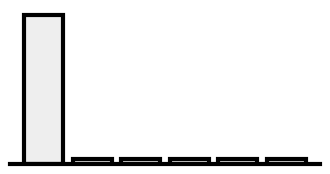

In [3]:
y1 = [30, 1, 1, 1, 1, 1]
species_freq(y1, outfile="fig1_community1_apples_species_freq_distr.pdf"); D1(y1)

### Community 2 (all fruits)

5.98726389483273

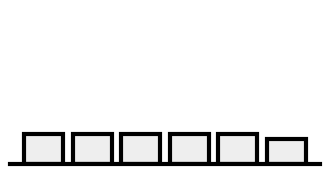

In [4]:
y2 = [6, 6, 6, 6, 6, 5]
species_freq(y2, outfile="fig1_community2_fruits_species_freq_distr.pdf"); D1(y2)

In [5]:
counts_1 = pd.DataFrame(
    {
      "Community 1": [30, 1, 1, 1, 1, 1], 
    },
    index=["apple", "orange", "banana", "pear", "blueberry", "grape"],
)

metacommunity_1 = Metacommunity(counts_1)

In [6]:
metacommunity_1.subcommunity_diversity(viewpoint=1, measure='alpha')

array([1.89654919])

In [7]:
metacommunity_1.to_dataframe(viewpoint=[0, 1, np.inf])

,community,viewpoint,alpha,rho,beta,gamma,normalized_alpha,normalized_rho,normalized_beta,rho_hat,beta_hat
0,metacommunity,0.0,6.000000,1.0,1.0,6.000000,6.000000,1.0,1.0,1.0,1.0
1,Community 1,0.0,6.000000,1.0,1.0,6.000000,6.000000,1.0,1.0,1.0,1.0
2,metacommunity,1.0,1.896549,1.0,1.0,1.896549,1.896549,1.0,1.0,1.0,1.0
3,Community 1,1.0,1.896549,1.0,1.0,1.896549,1.896549,1.0,1.0,1.0,1.0
4,metacommunity,inf,1.166667,1.0,1.0,1.166667,1.166667,1.0,1.0,1.0,1.0
5,Community 1,inf,1.166667,1.0,1.0,1.166667,1.166667,1.0,1.0,1.0,1.0


## Figure 2: Illustrates the effect of similarity on diversity

This figure looks something like this:

<img align=left width=300px src="fig2_thumbnail.png">

As above, the icons are all standard Apple emojis. We generate the heatmaps as follows.

### Community 3 (all birds)

For birds, we just make a random matrix with high similarity.

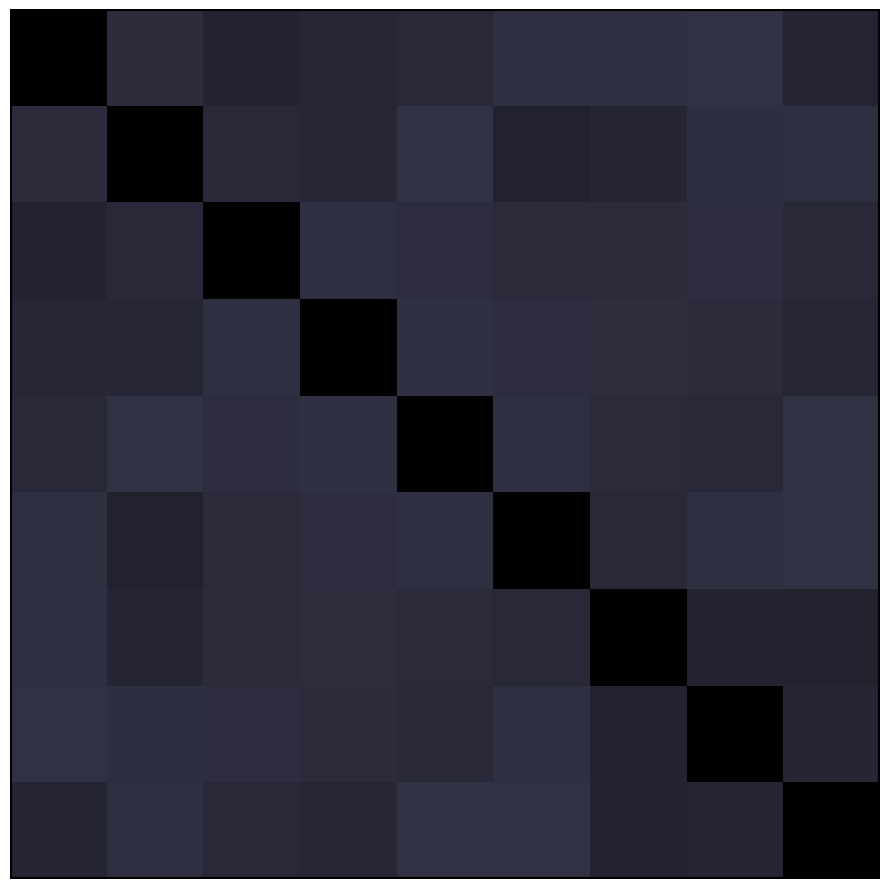

In [8]:
# for D1Z calculation (done separately, though could import and run in this notebook, when code is ready)
labels_3 = ["owl", "swan", "duck", "eagle", "turkey", "dodo", "dove", "fowl", "flamingo"]

# create matrix: random numbers close to 1
low=0.88; high=0.92       # highly similar, but not so similar that one can't see the diagonal
no_species_3 = len(labels_3)
S_3 = np.identity(n=no_species_3)
for i in range(no_species_3):
    for j in range(i+1, no_species_3):
        S_3[i][j] = np.random.uniform(low=low, high=high)
S_3 = np.maximum( S_3, S_3.transpose() )  # make symmetric

S_3 = pd.DataFrame(
    {
        labels_3[i]: S_3[i] for i in range(no_species_3)
    },
    index=labels_3,
)

# plot
similarity_matrix(S_3, scale=2, outfile="fig2_community3_birds_sim_matrix.pdf")

# save matrix
S_3.to_csv("S_3.csv", index=False)

In [9]:
S_3

,owl,swan,duck,eagle,turkey,dodo,dove,fowl,flamingo
owl,1.000000,0.894982,0.918029,0.909280,0.903946,0.886241,0.886240,0.882323,0.914647
swan,0.894982,1.000000,0.904045,0.908323,0.880823,0.918796,0.913298,0.888494,0.887273
duck,0.918029,0.904045,1.000000,0.887336,0.892170,0.900990,0.897278,0.891649,0.904474
eagle,0.909280,0.908323,0.887336,1.000000,0.885580,0.891686,0.894654,0.898243,0.911407
turkey,0.903946,0.880823,0.892170,0.885580,1.000000,0.887987,0.900569,0.903697,0.881858
dodo,0.886241,0.918796,0.900990,0.891686,0.887987,1.000000,0.904302,0.886821,0.882602
dove,0.886240,0.913298,0.897278,0.894654,0.900569,0.904302,1.000000,0.917955,0.918625
fowl,0.882323,0.888494,0.891649,0.898243,0.903697,0.886821,0.917955,1.000000,0.912336
flamingo,0.914647,0.887273,0.904474,0.911407,0.881858,0.882602,0.918625,0.912336,1.000000


In [10]:
counts_3 = pd.DataFrame({"Community 3": [1, 1, 1, 1, 1, 1, 1, 1, 1]},
    index=labels_3)
counts_3.to_csv("counts_3.csv", index=False)

In [11]:
counts_3

,Community 3
owl,1
swan,1
duck,1
eagle,1
turkey,1
dodo,1
dove,1
fowl,1
flamingo,1


In [12]:
metacommunity_3 = Metacommunity(counts_3, similarity=S_3)
metacommunity_3.subcommunity_diversity(viewpoint=1, measure='alpha')

array([1.09908705])

In [13]:
metacommunity_3.subcommunity_diversity(viewpoint=1, measure='normalized_alpha')

array([1.09908705])

### Community 4 (various animals)

Here, we care to manually make the similarities more realistic.

The species:

# 🐞🐝🦜🦋🐢🦞🦧🐠🦙

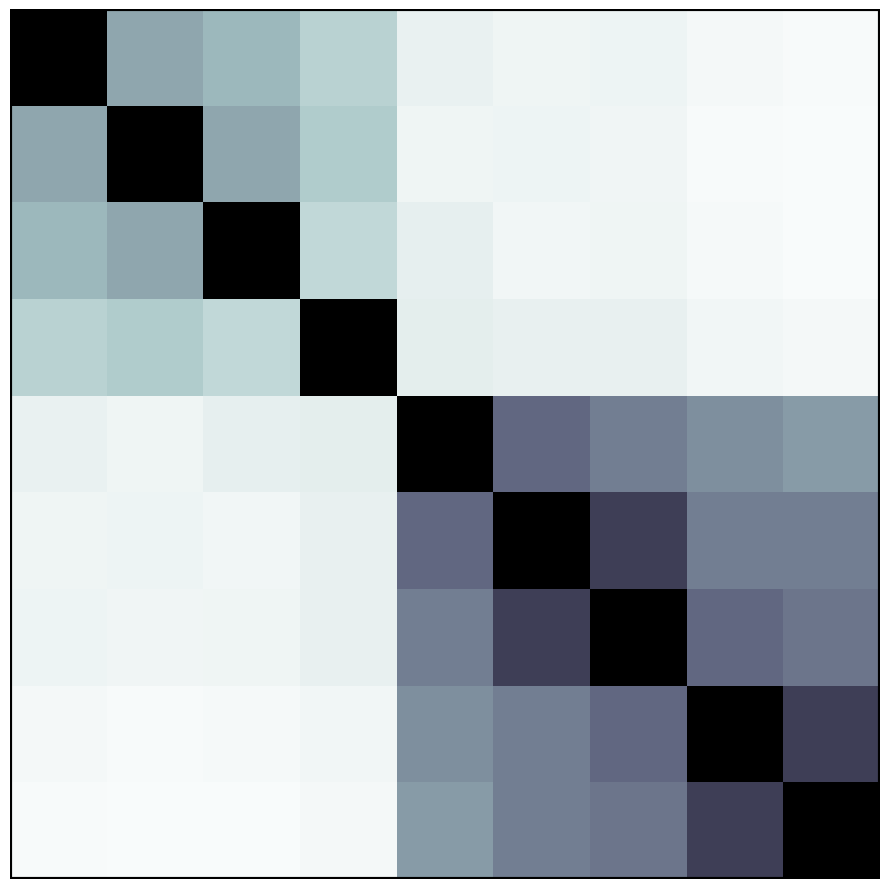

In [14]:
"""
invertebrates (insects -> arthropods) ->
fish -> reptile -> bird -> mammals

🐞🐝🦋🦞🐠🐢🦜🦙🦧
 0 1 2 3 4 5 6 7 8 
"""
# for D1Z calculation (done separately, though could import and run in this notebook, when code is ready)
labels_4 = ("ladybug", "bee", "butterfly", "lobster", "fish", "turtle", "parrot", "llama", "orangutan")

# create matrix: populate as i<j, and then symmetrize (values chosen to be consistent with Community 3's matrix)
no_species_4 = len(labels_4)
S_4 = np.identity(n=no_species_4)
S_4[0][1:9] = (0.60, 0.55, 0.45, 0.25, 0.22, 0.23, 0.18, 0.16) # ladybug
S_4[1][2:9] = (      0.60, 0.48, 0.22, 0.23, 0.21, 0.16, 0.14) # bee
S_4[2][3:9] = (            0.42, 0.27, 0.20, 0.22, 0.17, 0.15) # butterfly
S_4[3][4:9] = (                  0.28, 0.26, 0.26, 0.20, 0.18) # lobster
S_4[4][5:9] = (                        0.75, 0.70, 0.66, 0.63) # fish
S_4[5][6:9] = (                              0.85, 0.70, 0.70) # turtle
S_4[6][7:9] = (                                    0.75, 0.72) # parrot
S_4[7][8:9] = (                                          0.85) # llama
                                                             # orangutan
S_4 = np.maximum( S_4, S_4.transpose() )

S_4 = pd.DataFrame(
    {
        labels_4[i]: S_4[i] for i in range(no_species_4)
    },
    index=labels_4,
)

# plot
similarity_matrix(S_4, scale=2, outfile="fig2_community3_animals_sim_matrix.pdf")

# save matrix
S_4.to_csv("S_4.csv", index=False)

In [15]:
S_4

,ladybug,bee,butterfly,lobster,fish,turtle,parrot,llama,orangutan
ladybug,1.00,0.60,0.55,0.45,0.25,0.22,0.23,0.18,0.16
bee,0.60,1.00,0.60,0.48,0.22,0.23,0.21,0.16,0.14
butterfly,0.55,0.60,1.00,0.42,0.27,0.20,0.22,0.17,0.15
lobster,0.45,0.48,0.42,1.00,0.28,0.26,0.26,0.20,0.18
fish,0.25,0.22,0.27,0.28,1.00,0.75,0.70,0.66,0.63
turtle,0.22,0.23,0.20,0.26,0.75,1.00,0.85,0.70,0.70
parrot,0.23,0.21,0.22,0.26,0.70,0.85,1.00,0.75,0.72
llama,0.18,0.16,0.17,0.20,0.66,0.70,0.75,1.00,0.85
orangutan,0.16,0.14,0.15,0.18,0.63,0.70,0.72,0.85,1.00


Diversities (from Elliot):

    community	viewpoint	alpha	rho	beta	gamma	normalized_alpha	normalized_rho	normalized_beta
    animals	0	2.163129	1.0	1.0	2.163129	2.163129	1.0	1.0
    birds  	0	1.055917	1.0	1.0	1.055917	1.055917	1.0	1.0

In [16]:
counts_4 = pd.DataFrame({"Community 4": [1, 1, 1, 1, 1, 1, 1, 1, 1]},
    index=labels_4)
counts_4.to_csv("counts_4.csv", index=False)

In [17]:
counts_4

,Community 4
ladybug,1
bee,1
butterfly,1
lobster,1
fish,1
turtle,1
parrot,1
llama,1
orangutan,1


In [18]:
metacommunity_4 = Metacommunity(counts_4, similarity=S_4)
metacommunity_4.subcommunity_diversity(viewpoint=1, measure='alpha')

array([2.14151583])

## Figure 3: Illustrates beta diversity

In [19]:
# each phylum its own subcommunity; expect low representativeness
subcommunity_1 = ("🐞", "🐝", "🦋", "🦞")
subcommunity_2 = ("🐠", "🐢", "🦜", "🦙", "🦧")

# each subcommunity has memers from both phyla; expect high representativeness
subcommunity_3 = ("🐞",       "🦋",       "🐠",       "🦜",       "🦧")
subcommunity_4 = (      "🐝",       "🦞",       "🐢",       "🦙",     )

Beta diversities (also from Elliot). Recall viewpoint = q; rho = representativeness; beta = distinctiveness.

    community	viewpoint	alpha	rho	beta	gamma	normalized_alpha	normalized_rho	normalized_beta
    Subcommunity_4-1	0	3.537870	1.413333	0.707547	2.502149	1.572387	0.628148	1.591981
    Subcommunity_4-2	0	2.295129	1.213983	0.823735	1.891912	1.275071	0.674435	1.482723

    Subcommunity_4-3	0	3.579284	1.678248	0.595859	2.137174	1.988491	0.932360	1.072547
    Subcommunity_4-4	0	4.482633	2.068778	0.483377	2.195573	1.992281	0.919457	1.087599

In [20]:
counts_4a = pd.DataFrame({"Subcommunity_1": [1, 1, 1, 1, 0, 0, 0, 0, 0],
                         "Subcommunity_2": [0, 0, 0, 0, 1, 1, 1, 1, 1]}, index=labels_4)
counts_4a.to_csv("counts_4a.csv", index=False)

In [21]:
counts_4a

,Subcommunity_1,Subcommunity_2
ladybug,1,0
bee,1,0
butterfly,1,0
lobster,1,0
fish,0,1
turtle,0,1
parrot,0,1
llama,0,1
orangutan,0,1


In [22]:
metacommunity_4a = Metacommunity(counts_4a, similarity=S_4)
metacommunity_4a.subcommunity_diversity(viewpoint=0, measure='normalized_rho')

array([0.62814808, 0.67443493])

In [23]:
counts_4b = pd.DataFrame({"Subcommunity_3": [1, 0, 1, 0, 1, 0, 1, 0, 1],
                         "Subcommunity_4": [0, 1, 0, 1, 0, 1, 0, 1, 0]}, index=labels_4)
counts_4b.to_csv("counts_4b.csv", index=False)

In [24]:
counts_4b

,Subcommunity_3,Subcommunity_4
ladybug,1,0
bee,0,1
butterfly,1,0
lobster,0,1
fish,1,0
turtle,0,1
parrot,1,0
llama,0,1
orangutan,1,0


In [25]:
metacommunity_4b = Metacommunity(counts_4b, similarity=S_4)
metacommunity_4b.subcommunity_diversity(viewpoint=0, measure='normalized_rho')

array([0.93236011, 0.91945679])